In [1]:
!pip install tensorflow-addons

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow_addons.metrics import RSquare
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
import numpy as np
import random
np.random.seed(36)
forces = np.random.uniform(0,4,500)
volts = np.random.uniform(1,5,500)
I = (1/12)*(0.01**3)*(0.01)
L = 0.20
E = 10**7
deflection = np.array([((forces[i]*(L**3)/(3*E*I))+(0.1*volts[i]*(L**4)/(8*E*I))) for i in range(len(forces))])


switch = []


for i in range(len(deflection)):
  if 0.05<deflection[i]<0.6:
    switch.append(1)
  else:
    switch.append(0)

Load = np.column_stack((forces,volts))
switch = np.array(switch)

print(np.sum(switch==1))
print(np.sum(switch==0))

print(Load.shape)

222
278
(500, 2)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(Load, switch, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [17]:
model = Sequential()
model.add(Dense(256, activation = "relu", input_dim=2,name='hidden_1'))
model.add(Dense(256, activation = "relu",name='hidden_2'))

model.add(Dense(1,activation="sigmoid", name='output'))

# compile and train model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300,batch_size= 50)

Epoch 1/300
8/8 [==============================] - 1s 32ms/step - loss: 0.6992 - accuracy: 0.5025 - val_loss: 0.6772 - val_accuracy: 0.8000
Epoch 2/300
8/8 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.7975 - val_loss: 0.6333 - val_accuracy: 0.7400
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 0.6274 - accuracy: 0.7250 - val_loss: 0.5994 - val_accuracy: 0.7400
Epoch 4/300
8/8 [==============================] - 0s 11ms/step - loss: 0.6029 - accuracy: 0.7050 - val_loss: 0.5746 - val_accuracy: 0.7400
Epoch 5/300
8/8 [==============================] - 0s 11ms/step - loss: 0.5833 - accuracy: 0.7175 - val_loss: 0.5541 - val_accuracy: 0.7400
Epoch 6/300
8/8 [==============================] - 0s 13ms/step - loss: 0.5671 - accuracy: 0.7250 - val_loss: 0.5364 - val_accuracy: 0.7400
Epoch 7/300
8/8 [==============================] - 0s 11ms/step - loss: 0.5520 - accuracy: 0.7450 - val_loss: 0.5218 - val_accuracy: 0.7600
Epoch 8/300
8/8 [====

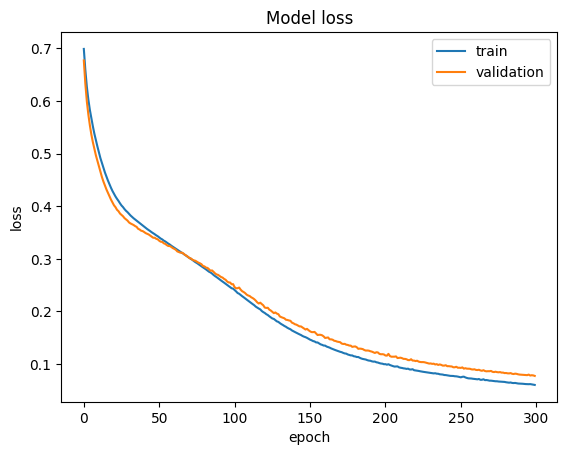

In [18]:
#plotting training history of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Creating Confusion matrix to evaluate our model

In [19]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [21]:
confusion_matrix(y_test, tf.round(y_preds))

array([[62,  0],
       [ 1, 37]])

# Making Confusion matrix more readable

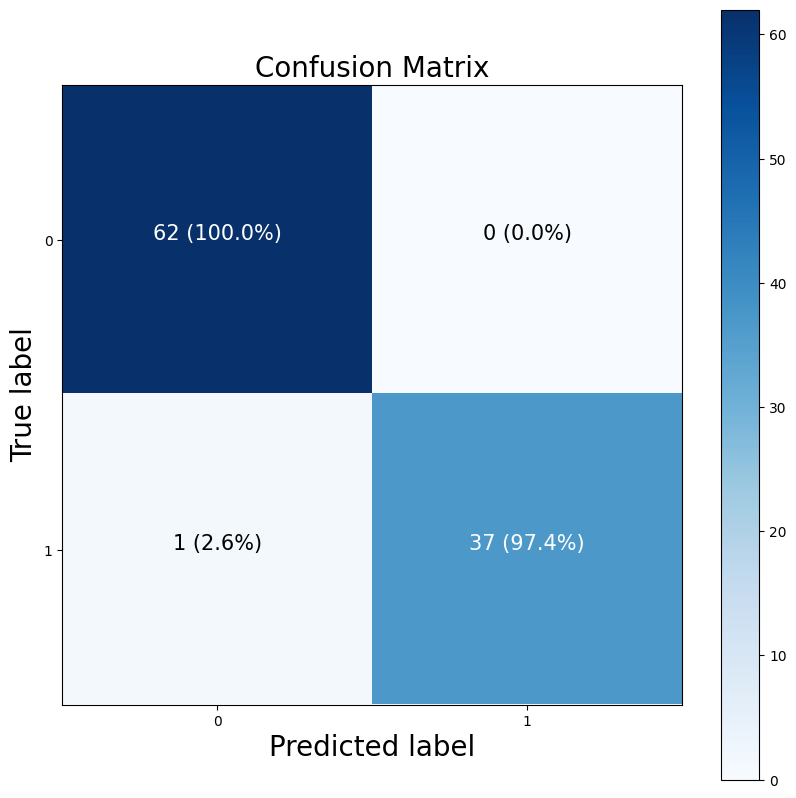

In [25]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]


fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)



# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)